# Analyzing borrowers’ risk of defaulting

Working for a bank’s loan division, we have to prepare a report to find out if a customer’s number of children, marital status, level of income and purpose of the loan have an impact on whether they will default on a loan. 

The bank already has some data on customers’ credit worthiness, but we have first to check if the collected data is ready to be analyzed.

This report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.


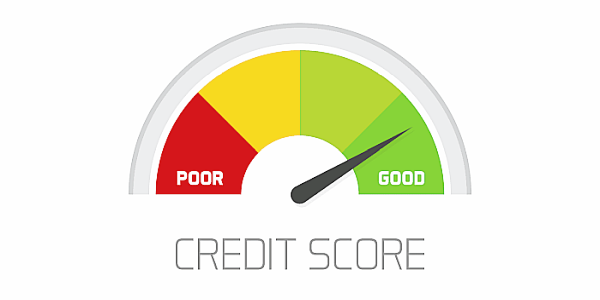

# Contents Table

### [ Data exploration](#step1)
- #### [ First discoveries](#step1a)
- #### [ Columns details](#step1b)
- #### [ Null Values](#step1c)

### [ Data transformation](#step2)
- #### [ Eliminating duplicates](#step2a)

### [ Working with missing values](#step3)
- #### [ Categorization of data](#step3a)
- #### [ Lemmatization](#step3b)

### [ Factors that can influence the loan payment](#step4)
- #### [ Having Children](#step4a)
- #### [ Family Status](#step4b)
- #### [ Income Level](#step4c)
- #### [ Credit Purpose](#step4d)
- #### [ Combining Data](#step4e)

### [ General Conclusions](#step5)




<hr>

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
import nltk
from nltk.stem import WordNetLemmatizer

In [2]:
# Load the data
try:
    credit= pd.read_csv('/datasets/credit_scoring_eng.csv')
except:
    credit= pd.read_csv('https://code.s3.yandex.net/datasets/credit_scoring_eng.csv')

<hr>

<a class="anchor" id="step1"></a>

# Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

[Now let's explore our data. You'll want to see how many columns and rows it has, look at a few rows to check for potential issues with the data.]

In [3]:
# Let's see how many rows and columns our dataset has
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
# let's print the first 10 rows
credit.head(10)


children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0    -926.185831         27    bachelor's degree             0   
6         0   -2879.202052         43    bachelor's degree             0   
7         0    -152.779569         50  SECONDARY EDUCATION             1   
8         2   -6929.865299         35    BACHELOR'S DEGREE             0   
9         0   -2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   
5  civil partnership                 1      M    business     0     40922.170   
6            married                 0      F    business     0     38484.156   
7            married                 0      M    employee     0     21731.829   
8  civil partnership                 1      F    employee     0     15337.093   
9            married                 0      M    employee     0     23108.150   

                               purpose  
0                purchase of the house  
1                         car purchase  
2                purchase of the house  
3              supplementary education  
4                    to have a wedding  
5                purchase of the house  
6                 housing transactions  
7                            education  
8                     having a wedding  
9  purchase of the house for my family

In [5]:
credit.describe()

children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949901      0.000000      0.000000   
25%        0.000000   -2747.423625     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt   total_income  
count      21525.000000  21525.000000   19351.000000  
mean           0.972544      0.080883   26787.568355  
std            1.420324      0.272661   16475.450632  
min            0.000000      0.000000    3306.762000  
25%            0.000000      0.000000   16488.504500  
50%            0.000000      0.000000   23202.870000  
75%            1.000000      0.000000   32549.611000  
max            4.000000      1.000000  362496.645000

<a class="anchor" id="step1a"></a>

## First discoveries

There are some issues that we can see in this data frame sample.
- The column days_employed has negative values and null values. Also the values are difficult to understand as real days of employment of a custommer.
- The column education has the categories in Upper and Lower cases that can difficult the categorization
- The column total_income presents also null vaues
- looking at the info we can see that the number of null values in the days_employed is the same of null values in the total_income - (2174 --> 10.09% of the total values)
- The column children presents some incorrect numbers (-1 and 20) that also need some attention
- The column dob_years has some ages marked as 0 years, so we have to deal also with this missing values

<hr>

<a class="anchor" id="step1b"></a>

## Columns details

In [6]:
#function to have a quick view on the numerical columns
def first_check(df,col):
    print(df[col].describe())
    print('number of null values:', len(df[df[col].isnull()]))
    fig = px.box(df, x=col, width=700, height=400)
    fig.show()


### days_employed column

This is a collumn with a lot of missing values, and also with stranges values that are difficulting  the analysis. 
Let's try to tackle those issues and create a cleaner data set for this column

Let's start filtering the null values to see how they are distributed in our data.

In [7]:
first_check(credit,'days_employed')

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64
number of null values: 2174


In [8]:
# Let's look at the filtered table with missing values in the the first column with missing data

days_emp_null = credit[credit['days_employed'].isnull()]
days_emp_null.head()
#days_emp_null.info()


children  days_employed  dob_years            education  education_id  \
12         0            NaN         65  secondary education             1   
26         0            NaN         41  secondary education             1   
29         0            NaN         63  secondary education             1   
41         0            NaN         50  secondary education             1   
55         0            NaN         54  secondary education             1   

        family_status  family_status_id gender    income_type  debt  \
12  civil partnership                 1      M        retiree     0   
26            married                 0      M  civil servant     0   
29          unmarried                 4      F        retiree     0   
41            married                 0      F  civil servant     0   
55  civil partnership                 1      F        retiree     1   

    total_income                   purpose  
12           NaN         to have a wedding  
26           NaN                 education  
29           NaN    building a real estate  
41           NaN  second-hand car purchase  
55           NaN         to have a wedding

In [9]:
#How many null days_employed
len(days_emp_null)

2174

Apparently, our sample showed that the rows with the null value in the days_employed column also presents null values in the total_income column, but it is important to check to confirm if this behavior is the same in the whole data frame

In [10]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.

check_null = credit[(credit.total_income.isnull()) & (credit.days_employed.isnull())] 
check_null.describe()

children  days_employed    dob_years  education_id  \
count  2174.000000            0.0  2174.000000   2174.000000   
mean      0.552438            NaN    43.632015      0.800828   
std       1.469356            NaN    12.531481      0.530157   
min      -1.000000            NaN     0.000000      0.000000   
25%       0.000000            NaN    34.000000      0.250000   
50%       0.000000            NaN    43.000000      1.000000   
75%       1.000000            NaN    54.000000      1.000000   
max      20.000000            NaN    73.000000      3.000000   

       family_status_id         debt  total_income  
count       2174.000000  2174.000000           0.0  
mean           0.975161     0.078197           NaN  
std            1.418220     0.268543           NaN  
min            0.000000     0.000000           NaN  
25%            0.000000     0.000000           NaN  
50%            0.000000     0.000000           NaN  
75%            1.000000     0.000000           NaN  
max            4.000000     1.000000           NaN

In [11]:
check_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


### **Intermediate conclusion**

With this last check, we proved that the missing values are symetric, because both columns _total_income_ and _days_employed_ return zero non-null responses, showing that they are nulls at the same row every time.

let's now to check what is the percentage of nulls values in the data frame. 

In [12]:
#percentage of nulls values

rows_total = credit['purpose'].count()
nulls_total = credit[credit.days_employed.isnull()]['purpose'].count()
nulls_percent = nulls_total / rows_total *100
print(nulls_percent)

10.099883855981417


<a class="anchor" id="step1c"></a>

## Null Values

### **percentage of nulls values**

looking at the info we can see that the number of null values in the days_employed and the  is the same of null values in the total_income - (2174 --> ~10.10% of the total values.
Further on we will have to decide how to address the issue of the missing values in each column.

### **checking nulls values distribution**

So maybe the lack of the data is related to an specific category in the data frame (for instance - retirees have no income, and therefore their total_income is NaN) or the missing values appear randomicly over the entire set

OBs. Because we are working with this simetric missing of values, we can check at the same time the influence of others categories at the _total_income_ and _days_employed_ at the same time

In [13]:
def null_check(col):
    total = credit[col].value_counts()
    null = credit[credit.days_employed.isnull()][col].value_counts()
    ratio_null = null / total
    print("")
    print(col)
    print("")
    print(ratio_null)
    print("")
    print("*******************************************")

In [14]:
cols = ['income_type','family_status','education','purpose']
for c in cols:
    null_check(c)


income_type

business                       0.099902
civil servant                  0.100754
employee                       0.099379
entrepreneur                   0.500000
paternity / maternity leave         NaN
retiree                        0.107106
student                             NaN
unemployed                          NaN
Name: income_type, dtype: float64

*******************************************

family_status

married              0.099919
civil partnership    0.105818
unmarried            0.102382
divorced             0.093724
widow / widower      0.098958
Name: family_status, dtype: float64

*******************************************

education

BACHELOR'S DEGREE      0.083942
Bachelor's Degree      0.093284
GRADUATE DEGREE             NaN
Graduate Degree             NaN
PRIMARY EDUCATION      0.058824
Primary Education      0.066667
SECONDARY EDUCATION    0.086788
SOME COLLEGE           0.241379
Secondary Education    0.091421
Some College           0.148936
bachelor

In [15]:
null_check('income_type')


income_type

business                       0.099902
civil servant                  0.100754
employee                       0.099379
entrepreneur                   0.500000
paternity / maternity leave         NaN
retiree                        0.107106
student                             NaN
unemployed                          NaN
Name: income_type, dtype: float64

*******************************************


For these results it seems that the distribution of the nulls values is randomic, distibuted among the different columns

### Possible reasons for missing values in data

The missing values are not showing any correlation with a special category, we see them divided all around the columns, without any clear correlation so we can suppose that this can be due a human or technical problem at the moment to gather the customers' information.

<hr> 

<a class="anchor" id="step2"></a>

# Data transformation

Let's look more carefully to each column

### education
This column has the categories in Upper and Lower cases that can difficult the categorization

In [16]:
# Let's see all values in education column to check if and what spellings will need to be fixed
credit['education'].value_counts()


secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [17]:
# Fix the registers if required
credit['education']=credit['education'].str.lower()
credit['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

### children
 This column presents some incorrect numbers that also need some attention

In [18]:
first_check(credit,'children')

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64
number of null values: 0


In [19]:
# Let's see the distribution of values in the `children` column
credit['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

There is two strange values on the set: -1 and 20 but the percentage is very low compared with the total entries of data.
Those could be typing mistakes or any other problem. 
I sugest to change -1 to 1 and 20 to 2, without great change to the whole data set.

In [20]:
# [fix the data based on your decision]
credit['children'].replace(-1,1,inplace=True)
credit['children'].replace(20,2,inplace=True)


In [21]:
# Checking the `children` column again to make sure it's all fixed

credit['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

### days_employed

The column days_employed has negative values and null values. Also the values are difficult to understand as real days of employment of a custommer.


In [22]:
first_check(credit,'days_employed')

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64
number of null values: 2174


In [23]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
credit.groupby('income_type')['days_employed'].describe().T

income_type      business  civil servant      employee  entrepreneur  \
count         4577.000000    1312.000000  10014.000000      1.000000   
mean         -2111.524398   -3399.896902  -2326.499216   -520.848083   
std           2048.448594    2788.371363   2307.924129           NaN   
min         -17615.563266  -15193.032201 -18388.949901   -520.848083   
25%          -2876.648520   -4759.399260  -3108.123025   -520.848083   
50%          -1547.382223   -2689.368353  -1574.202821   -520.848083   
75%           -685.687432   -1257.171811   -746.027361   -520.848083   
max            -30.195337     -39.954170    -24.141633   -520.848083   

income_type  paternity / maternity leave        retiree     student  \
count                           1.000000    3443.000000    1.000000   
mean                        -3296.759962  365003.491245 -578.751554   
std                                  NaN   21069.606065         NaN   
min                         -3296.759962  328728.720605 -578.751554   
25%                         -3296.759962  346649.346146 -578.751554   
50%                         -3296.759962  365213.306266 -578.751554   
75%                         -3296.759962  383231.396871 -578.751554   
max                         -3296.759962  401755.400475 -578.751554   

income_type     unemployed  
count             2.000000  
mean         366413.652744  
std           40855.478519  
min          337524.466835  
25%          351969.059790  
50%          366413.652744  
75%          380858.245699  
max          395302.838654

Let's try to get a better understanding, changing from days to years

In [24]:
#transform it to years to --> 365 days = 1 year
credit['years_employed'] = credit['days_employed']/365
credit['years_employed'].head()

0    -23.116912
1    -11.026860
2    -15.406637
3    -11.300677
4    932.235814
Name: years_employed, dtype: float64

Looking in the values in years, we can see that we have a lot of imposible values in the set (more than 900 years working...) so this make it difficult to substitute the NaN values with some valid mean.

[If the amount of problematic data is high, it could've been due to some technical issues. We may probably want to propose the most obvious reason why it could've happened and what the correct data might've been, as we can't drop these problematic rows.]

I will just check if I can find any correlation between age, type of work and worked years, to sugest some rational substitution

In [25]:
credit[['years_employed','dob_years', 'income_type' ]].head(10)



years_employed  dob_years income_type
0      -23.116912         42    employee
1      -11.026860         36    employee
2      -15.406637         33    employee
3      -11.300677         32    employee
4      932.235814         53     retiree
5       -2.537495         27    business
6       -7.888225         43    business
7       -0.418574         50    employee
8      -18.985932         35    employee
9       -5.996593         41    employee

In [26]:
credit.groupby('income_type')['years_employed'].describe().T


income_type     business  civil servant      employee  entrepreneur  \
count        4577.000000    1312.000000  10014.000000      1.000000   
mean           -5.784998      -9.314786     -6.373970     -1.426981   
std             5.612188       7.639374      6.323080           NaN   
min           -48.261817     -41.624746    -50.380685     -1.426981   
25%            -7.881229     -13.039450     -8.515406     -1.426981   
50%            -4.239403      -7.368132     -4.312884     -1.426981   
75%            -1.878596      -3.444306     -2.043911     -1.426981   
max            -0.082727      -0.109463     -0.066141     -1.426981   

income_type  paternity / maternity leave      retiree   student   unemployed  
count                           1.000000  3443.000000  1.000000     2.000000  
mean                           -9.032219  1000.009565 -1.585621  1003.873021  
std                                  NaN    57.724948       NaN   111.932818  
min                            -9.032219   900.626632 -1.585621   924.724567  
25%                            -9.032219   949.724236 -1.585621   964.298794  
50%                            -9.032219  1000.584401 -1.585621  1003.873021  
75%                            -9.032219  1049.949033 -1.585621  1043.447248  
max                            -9.032219  1100.699727 -1.585621  1083.021476

Looking at the description we can identify two patterns:

1) The negative values were assigned to active employment activities (business, employee, entrepeneur, etc) - to correct this issue we have to make all those values positive again




In [27]:
#first let's eliminate the negative numbers
credit['years_employed'] = abs(credit['years_employed'])

In [28]:
#let's check the values again
credit.groupby('income_type')['years_employed'].describe().T

income_type     business  civil servant      employee  entrepreneur  \
count        4577.000000    1312.000000  10014.000000      1.000000   
mean            5.784998       9.314786      6.373970      1.426981   
std             5.612188       7.639374      6.323080           NaN   
min             0.082727       0.109463      0.066141      1.426981   
25%             1.878596       3.444306      2.043911      1.426981   
50%             4.239403       7.368132      4.312884      1.426981   
75%             7.881229      13.039450      8.515406      1.426981   
max            48.261817      41.624746     50.380685      1.426981   

income_type  paternity / maternity leave      retiree   student   unemployed  
count                           1.000000  3443.000000  1.000000     2.000000  
mean                            9.032219  1000.009565  1.585621  1003.873021  
std                                  NaN    57.724948       NaN   111.932818  
min                             9.032219   900.626632  1.585621   924.724567  
25%                             9.032219   949.724236  1.585621   964.298794  
50%                             9.032219  1000.584401  1.585621  1003.873021  
75%                             9.032219  1049.949033  1.585621  1043.447248  
max                             9.032219  1100.699727  1.585621  1083.021476

2) The very big positive values were assigned to non active categories (unemployed and retiree) maybe as an internal code to identify this kind of customer without an income - we cannot find a clear reference value to subtract from those numbers, because the difference between the min and max of the retirees' years of work is about 200 years. 

A) Only in the case of necessity we can e consider that  average retirement age is 64 for a work life of about 42 years to replace those wrong values of the retirees years_employed 
(Us Values gathered by Teresa Ghilarducci https://www.forbes.com/sites/teresaghilarducci/2021/05/28/how-many-years-do-you-have-to-work-before-you-retire/?sh=583dd8bf706d))

B) The number of unemployed is irrelevant for the calculations (2 cases) so to make it easier I will apply the same change to 42 years also for this group 




In [29]:
credit.loc[ credit['years_employed'] > 900, 'years_employed'] = 42    

In [30]:
#Checking the changes
credit[['years_employed','dob_years', 'income_type' ]].head(10)

years_employed  dob_years income_type
0       23.116912         42    employee
1       11.026860         36    employee
2       15.406637         33    employee
3       11.300677         32    employee
4       42.000000         53     retiree
5        2.537495         27    business
6        7.888225         43    business
7        0.418574         50    employee
8       18.985932         35    employee
9        5.996593         41    employee

Now we still have to substitute the NaN values to finally get a clean column.
To get more precise values, Let's see the median for each income type. and substitute those values in the years_employed column

In [31]:
credit['years_employed'].isnull().value_counts()

False    19351
True      2174
Name: years_employed, dtype: int64

In [32]:

credit.groupby('income_type')['years_employed'].describe().T

income_type     business  civil servant      employee  entrepreneur  \
count        4577.000000    1312.000000  10014.000000      1.000000   
mean            5.784998       9.314786      6.373970      1.426981   
std             5.612188       7.639374      6.323080           NaN   
min             0.082727       0.109463      0.066141      1.426981   
25%             1.878596       3.444306      2.043911      1.426981   
50%             4.239403       7.368132      4.312884      1.426981   
75%             7.881229      13.039450      8.515406      1.426981   
max            48.261817      41.624746     50.380685      1.426981   

income_type  paternity / maternity leave  retiree   student  unemployed  
count                           1.000000   3443.0  1.000000         2.0  
mean                            9.032219     42.0  1.585621        42.0  
std                                  NaN      0.0       NaN         0.0  
min                             9.032219     42.0  1.585621        42.0  
25%                             9.032219     42.0  1.585621        42.0  
50%                             9.032219     42.0  1.585621        42.0  
75%                             9.032219     42.0  1.585621        42.0  
max                             9.032219     42.0  1.585621        42.0

In [33]:
# Using the transform method to replace the values
credit['years_employed'] = credit.groupby('income_type')['years_employed']\
.transform(lambda grp: grp.fillna(np.mean(grp)))

Checking the changed values: 

In [34]:
first_check(credit,'years_employed')

count    21525.000000
mean        12.818984
std         14.679172
min          0.066141
25%          2.809725
50%          6.373970
75%         14.649382
max         50.380685
Name: years_employed, dtype: float64
number of null values: 0


Finally, this values appear to be more according to worked years in the new column years_employed

### dob_years (age)
The column dob_years has some ages marked as 0 years, so we have to deal also with this missing values

In [35]:
first_check(credit,'dob_years')

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64
number of null values: 0


In [36]:
# Check the `dob_years` for suspicious values and count the percentage

len(credit[credit['dob_years']==0])

101

We found 101 "0" years at the dob_years columns, Let's check if  there is  a rational distribution on this data anomaly:

In [37]:
# Address the issues in the `dob_years` column, if they exist

zero_age = credit[credit['dob_years'] == 0]
zero_age[['income_type', 'family_status',"education"]].tail(10)



income_type      family_status            education
18539       business          unmarried    bachelor's degree
18732       business  civil partnership    bachelor's degree
18851  civil servant            married  secondary education
19116        retiree            married    bachelor's degree
19371       business            married    bachelor's degree
19829       employee            married  secondary education
20462        retiree            married  secondary education
20577        retiree          unmarried  secondary education
21179       business            married    bachelor's degree
21313       employee          unmarried  secondary education

It appears that the zero was randomically assigned  - maybe for people who didn't give their age at the process or due a technical issue - Let's calculate the percentage of nulls values

In [38]:
#percentage of nulls values

rows_total = credit['purpose'].count()
nulls_total = zero_age['purpose'].count()
nulls_percent = nulls_total / rows_total *100
print(nulls_percent)

0.4692218350754936


The zero age percentage is really low (less than 0.5%), so we can ignore it or replace it it for the median of the column - The change will not influence on the general data

In [39]:
# Check the result - make sure it's fixed
credit.loc[ credit['dob_years'] == 0, 'dob_years'] = credit['dob_years'].median()


In [40]:
#no more zero age on the set - the column is clean
len(credit[credit['dob_years'] == 0])

0

### family_status
This column presents the marital status of the customer. Let's check the data

In [41]:
# Let's see the values for the column

credit['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

The Data seems to be clean with all values and with 5 different categories

### gender
Let's check the data at this column

In [42]:
credit['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In this column only one value differs of the expected categories - The XNA probably refers to someone that didn't wanted to declare the gender. In this case, we can keep the data as it is on the data frame

### income_type

Define the current job employment situation of the customers.

In [43]:
# Let's see the values in the column
credit['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [44]:
len(credit[credit.income_type.isin(['unemployed','entrepreneur','student', 'paternity / maternity leave'])])/len(credit)*100

0.027874564459930314

In [45]:
credit = credit[~credit.income_type.isin(['unemployed','entrepreneur','student', 'paternity / maternity leave'])]
credit['income_type'].value_counts()

employee         11119
business          5085
retiree           3856
civil servant     1459
Name: income_type, dtype: int64

The Data seems to be clean with all values divide by 8 different categories
We have 4 categories representing  together less than 0,028% of the total values, so the results for those groups will not be statistically valid, and we can drop them. 

<a class="anchor" id="step2a"></a>
## Eliminating duplicates

In [46]:
# Checking duplicates
len(credit[credit.duplicated()])


72

Every row of the dataset cointains specifical information of one person. It's very rare for instance if two persons have the same time of work, age and total income, so we can consider the duplicates as a double input or by human mistake - the client made two different registers, or the system for any reason (double click on the submit button, or a data transference issue) get those duplicate values.
For our study, we can drop them to get a more accurate result

In [47]:
# Address the duplicates, if they exist
credit.drop_duplicates(inplace=True)


In [48]:
# Last check whether we have any duplicates
len(credit[credit.duplicated()])

0

In [49]:
# Check the size of the dataset that you now have after your first manipulations with it
credit.shape

(21447, 13)

<a class="anchor" id="step3"></a>
# Working with missing values

### Age groups

 To facilitate our understanding we can divide the age in three categories: young, adult and retired:


In [50]:
# Let's write a function that calculates the age category

def age_group(age):
            
    if age <= 35:
        return 'young'
    if age <= 64:
        return 'adult'
    return 'retired' 

In [51]:
# Test if the function works
print(age_group(25)) 
print(age_group(47)) 
print(age_group(72)) 


young
adult
retired


In [52]:
# Creating new column based on function
credit['age_group'] = credit['dob_years'].apply(age_group)


In [53]:
# Checking how values in the new column
credit['age_group'].value_counts()



adult      13972
young       6580
retired      895
Name: age_group, dtype: int64

### total_income
The column total_income presents also null vaues
looking at the info we can see that the number of null values in the days_employed is the same of null values in the total_income - (2174 --> 10.09% of the total values)

Let's look at factors that can affect the total income  - what kind of work (income_type) , age (age_group) and level of education (education) are fundamental to the level of a customer's income

(The marital status and the number of children will affect how they expend the money, not the income itself so we are not looking at them now)

So let's create a table with the non-null values to check their influence on our task

In [54]:
first_check(credit,'total_income')

count     19346.000000
mean      26786.933500
std       16471.935115
min        3306.762000
25%       16493.600500
50%       23203.328000
75%       32550.337000
max      362496.645000
Name: total_income, dtype: float64
number of null values: 2101


In [55]:
income_notnull =credit[credit['total_income'].notna()]
income_notnull.head(10)

children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  secondary education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0    -926.185831         27    bachelor's degree             0   
6         0   -2879.202052         43    bachelor's degree             0   
7         0    -152.779569         50  secondary education             1   
8         2   -6929.865299         35    bachelor's degree             0   
9         0   -2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   
5  civil partnership                 1      M    business     0     40922.170   
6            married                 0      F    business     0     38484.156   
7            married                 0      M    employee     0     21731.829   
8  civil partnership                 1      F    employee     0     15337.093   
9            married                 0      M    employee     0     23108.150   

                               purpose  years_employed age_group  
0                purchase of the house       23.116912     adult  
1                         car purchase       11.026860     adult  
2                purchase of the house       15.406637     young  
3              supplementary education       11.300677     young  
4                    to have a wedding       42.000000     adult  
5                purchase of the house        2.537495     young  
6                 housing transactions        7.888225     adult  
7                            education        0.418574     adult  
8                     having a wedding       18.985932     young  
9  purchase of the house for my family        5.996593     adult

In [56]:
# Look at the mean values for income based on your identified factors
income_notnull.groupby('income_type')['total_income'].mean().reset_index()

income_type  total_income
0       business  32386.793835
1  civil servant  27343.729582
2       employee  25820.841683
3        retiree  21940.394503

In [57]:
income_notnull.groupby('education')['total_income'].mean().reset_index()

education  total_income
0    bachelor's degree  33136.737177
1      graduate degree  27960.024667
2    primary education  21144.882211
3  secondary education  24596.766073
4         some college  29045.443644

In [58]:
income_notnull.groupby('age_group')['total_income'].mean().reset_index()

age_group  total_income
0     adult  27106.648032
1   retired  21542.650450
2     young  26831.959511

In [59]:
# Let's look at the average values for income based on the identified factors
income_notnull.groupby(['age_group' ,'income_type','education'])['total_income'].mean().reset_index()

age_group    income_type            education  total_income
0      adult       business    bachelor's degree  41326.015731
1      adult       business    primary education  27465.699938
2      adult       business  secondary education  29398.898528
3      adult       business         some college  38249.139156
4      adult  civil servant    bachelor's degree  33411.727176
5      adult  civil servant      graduate degree  17822.757000
6      adult  civil servant    primary education  29226.143400
7      adult  civil servant  secondary education  24454.544815
8      adult  civil servant         some college  34410.317571
9      adult       employee    bachelor's degree  32331.770218
10     adult       employee      graduate degree  31089.653667
11     adult       employee    primary education  21205.112977
12     adult       employee  secondary education  24865.024114
13     adult       employee         some college  29939.386009
14     adult        retiree    bachelor's degree  27374.849161
15     adult        retiree      graduate degree  40868.031000
16     adult        retiree    primary education  18232.454903
17     adult        retiree  secondary education  21513.009295
18     adult        retiree         some college  21693.357926
19   retired       business    bachelor's degree  36511.752000
20   retired       business  secondary education  29612.208680
21   retired       business         some college  20094.359000
22   retired  civil servant    bachelor's degree  27230.450600
23   retired  civil servant  secondary education  26793.207333
24   retired       employee    bachelor's degree  29825.374308
25   retired       employee    primary education  28699.120000
26   retired       employee  secondary education  24322.353605
27   retired       employee         some college  33054.754750
28   retired        retiree    bachelor's degree  26963.545728
29   retired        retiree      graduate degree  15800.399000
30   retired        retiree    primary education  16966.253935
31   retired        retiree  secondary education  19402.919609
32   retired        retiree         some college  23603.392750
33     young       business    bachelor's degree  35530.032014
34     young       business    primary education  25108.724923
35     young       business  secondary education  27276.517042
36     young       business         some college  28184.231612
37     young  civil servant    bachelor's degree  29282.069562
38     young  civil servant    primary education  30563.383000
39     young  civil servant  secondary education  25025.998305
40     young  civil servant         some college  24615.185406
41     young       employee    bachelor's degree  28693.871021
42     young       employee    primary education  23207.622217
43     young       employee  secondary education  23572.711347
44     young       employee         some college  26845.730055
45     young        retiree    bachelor's degree  34394.128000
46     young        retiree  secondary education  17860.639667

In [60]:
# Let's look at the average values for income based on the identified factors
income_notnull.groupby(['age_group' ,'income_type','education'])['total_income'].median().reset_index()

age_group    income_type            education  total_income
0      adult       business    bachelor's degree    34685.1670
1      adult       business    primary education    27036.7905
2      adult       business  secondary education    25897.5560
3      adult       business         some college    34472.6225
4      adult  civil servant    bachelor's degree    28463.9460
5      adult  civil servant      graduate degree    17822.7570
6      adult  civil servant    primary education    16922.6250
7      adult  civil servant  secondary education    21608.9730
8      adult  civil servant         some college    28018.8480
9      adult       employee    bachelor's degree    27537.3165
10     adult       employee      graduate degree    31771.3210
11     adult       employee    primary education    20073.1860
12     adult       employee  secondary education    22166.1145
13     adult       employee         some college    26595.4780
14     adult        retiree    bachelor's degree    24013.2625
15     adult        retiree      graduate degree    40868.0310
16     adult        retiree    primary education    17657.4995
17     adult        retiree  secondary education    18776.0315
18     adult        retiree         some college    19074.9510
19   retired       business    bachelor's degree    29299.7640
20   retired       business  secondary education    24259.6870
21   retired       business         some college    20094.3590
22   retired  civil servant    bachelor's degree    23390.0570
23   retired  civil servant  secondary education    26122.5710
24   retired       employee    bachelor's degree    28491.7930
25   retired       employee    primary education    28699.1200
26   retired       employee  secondary education    23550.5120
27   retired       employee         some college    32844.1030
28   retired        retiree    bachelor's degree    21073.8920
29   retired        retiree      graduate degree    15800.3990
30   retired        retiree    primary education    15013.5050
31   retired        retiree  secondary education    17342.4705
32   retired        retiree         some college    19789.9350
33     young       business    bachelor's degree    30507.5155
34     young       business    primary education    21032.9180
35     young       business  secondary education    24973.5780
36     young       business         some college    25856.2635
37     young  civil servant    bachelor's degree    25633.3165
38     young  civil servant    primary education    30563.3830
39     young  civil servant  secondary education    22612.9680
40     young  civil servant         some college    24474.9540
41     young       employee    bachelor's degree    25183.5225
42     young       employee    primary education    20039.6275
43     young       employee  secondary education    21114.6950
44     young       employee         some college    23383.5115
45     young        retiree    bachelor's degree    34394.1280
46     young        retiree  secondary education    15083.2080

Looking at this values it is clear that there is some high salaries that are pulling the average up. To avoid such deviations I will apply the median for each null value, and to be more precise based on three aspects age group, income type and education

In [61]:
# Using the transform method to replace the values

credit['total_income_new'] = credit.groupby(['age_group' ,'income_type','education'])['total_income']\
.transform(lambda grp: grp.fillna(grp.median()))

Let's check if the changes were properly made by comparing the null values of the original colums total_income, with the created total_income_new.
We can see also the values of the medians on the income_notnull.groupby description above are the values that were inserted in the new column

In [62]:
first_check(credit,'total_income_new')

count     21447.000000
mean      26480.821448
std       15723.163379
min        3306.762000
25%       17208.830000
50%       22989.285000
75%       31559.262500
max      362496.645000
Name: total_income_new, dtype: float64
number of null values: 0


In [63]:
#Comparing the new median if the old before replacing the missing values
mednew = credit['total_income_new'].median()
medold = income_notnull['total_income'].median()
mednew, medold

(22989.285, 23203.328)

[When you think you've finished with `total_income`, check that the total number of values in this column matches the number of values in other ones.]

In [64]:
credit.shape

(21447, 15)

In [65]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21447 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21447 non-null  int64  
 1   days_employed     19346 non-null  float64
 2   dob_years         21447 non-null  int64  
 3   education         21447 non-null  object 
 4   education_id      21447 non-null  int64  
 5   family_status     21447 non-null  object 
 6   family_status_id  21447 non-null  int64  
 7   gender            21447 non-null  object 
 8   income_type       21447 non-null  object 
 9   debt              21447 non-null  int64  
 10  total_income      19346 non-null  float64
 11  purpose           21447 non-null  object 
 12  years_employed    21447 non-null  float64
 13  age_group         21447 non-null  object 
 14  total_income_new  21447 non-null  float64
dtypes: float64(4), int64(5), object(6)
memory usage: 2.6+ MB


Our table is free of missing values. Let's work on the categorization before creating a credit score for the bank

<a class="anchor" id="step3a"></a>
## Categorization of data

The bank want to know from four characteristics, how they impact on the abillity to repay a loan.
The data refered to number of children, marital status, level of income and purpose of the loan.

The data for number of children and marital status is ready to be analyzed.

We have to categorize the level of income and the purpose of the loan to get the results for the rquired questions.


### Categorizing the purpose

Let's check the values in our purpose column to check if there is some way to create categories:

In [66]:
# Print the values for your selected data for categorization

credit['purpose'].value_counts()

wedding ceremony                            791
having a wedding                            766
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
transactions with commercial real estate    650
buying property for renting out             650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                634
property                                    633
transactions with my real estate            627
building a real estate                      624
buy real estate                             621
purchase of my own house                    620
building a property                         619
housing renovation                          606
buy residential real estate                 605
buying my own car                       

Those values refered to four major categories: Housing / Car / Wedding / Education
Let's categorize it creating a function and then applying it to the data  to create a neww column.

In [67]:
def category_purpose(purpose): 
  
    if "car" in purpose:
        return "car"
    if "hous" in purpose or 'estate' in purpose or 'property' in purpose:
        return "housing"
    if "educ" in purpose or 'university' in purpose:
        return "education"
    if "wedding" in purpose:
        return "wedding"
        

In [152]:
string1 = "I want to buy a car"
string2 = "I want to rent a property"
string3 = 'I need money for my education'
string4 = 'I want a beautiful wedding'
print(category_purpose(string1))
print(category_purpose(string2))
print(category_purpose(string3))
print(category_purpose(string4))

car
housing
education
wedding


In [69]:
# Create a column with the categories and count the values for them
credit['purpose_category'] = credit['purpose'].apply(category_purpose)
credit['purpose_category'].value_counts()

housing      10807
car           4305
education     4013
wedding       2322
Name: purpose_category, dtype: int64

<a class="anchor" id="step3b"></a>
## Lemmatization

In [136]:
nltk.download('wordnet') 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [137]:
wordnet_lemma = WordNetLemmatizer() 

In [176]:
 def cat_lemmas(txt):   
    word = nltk.word_tokenize(txt)
    lemmas = [wordnet_lemma.lemmatize(w, pos='n') for w in word]
    
    if "car" in lemmas:
        return "car"
        
    if ("house" in lemmas) or ('estate' in lemmas) or ('property' in lemmas) or (("housing" in lemmas)):
        return "housing"
    
    if ("education" in lemmas) or ("educated" in lemmas)or ("university" in lemmas):
        return "education"
    
    if "wedding" in lemmas:
        return "wedding"
    
    #print(word, lemmas)




In [173]:
cat_lemmas(string3)

'education'

In [174]:
print(cat_lemmas(string1), cat_lemmas(string2), cat_lemmas(string3), cat_lemmas(string4) )

car housing education wedding


In [177]:
credit['lemmas']= credit['purpose'].apply(lambda x: cat_lemmas(x))

In [180]:
credit.head()

children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  secondary education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   

                   purpose  years_employed age_group  total_income_new  \
0    purchase of the house       23.116912     adult         40620.102   
1             car purchase       11.026860     adult         17932.802   
2    purchase of the house       15.406637     young         23341.752   
3  supplementary education       11.300677     young         42820.568   
4        to have a wedding       42.000000     adult         25378.572   

  purpose_category income_category     lemmas  
0          housing            high    housing  
1              car          medium        car  
2          housing          medium    housing  
3        education            high  education  
4          wedding          medium    wedding

### Categorizing the income
Let's check the values in our income column to check if there is some way to create categories:

In [73]:
# Looking through all the numerical data in your selected column for categorization
credit['total_income_new'].describe()


count     21447.000000
mean      26480.821448
std       15723.163379
min        3306.762000
25%       17208.830000
50%       22989.285000
75%       31559.262500
max      362496.645000
Name: total_income_new, dtype: float64

Looking at the values above, I propose the categorization of the income values in three different types:
Low - 25% or less of the values ,  Medium - from 25% till 75% of the values and High 75% and higher


In [74]:
def category_income(income): 
  
    if income <= 17203:
        return "low"
    if income >= 31562:
        return "high"
    else:
        return "medium"



In [75]:
# testing the function

print(category_income(34000))
print(category_income(24000))
print(category_income(14000))

high
medium
low


In [76]:
# Creating column with categories
credit['income_category'] = credit['total_income_new'].apply(category_income)
credit['income_category'].value_counts()

medium    10726
high       5361
low        5360
Name: income_category, dtype: int64

To answer our questions we have to evaluate the groups of persons who does pay and not pay  their loans:

In [77]:
debt_good = credit[credit['debt'] == 0]
debt_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19708 entries, 0 to 21524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19708 non-null  int64  
 1   days_employed     17777 non-null  float64
 2   dob_years         19708 non-null  int64  
 3   education         19708 non-null  object 
 4   education_id      19708 non-null  int64  
 5   family_status     19708 non-null  object 
 6   family_status_id  19708 non-null  int64  
 7   gender            19708 non-null  object 
 8   income_type       19708 non-null  object 
 9   debt              19708 non-null  int64  
 10  total_income      17777 non-null  float64
 11  purpose           19708 non-null  object 
 12  years_employed    19708 non-null  float64
 13  age_group         19708 non-null  object 
 14  total_income_new  19708 non-null  float64
 15  purpose_category  19708 non-null  object 
 16  income_category   19708 non-null  object

In [78]:
debt_bad = credit[credit['debt'] == 1]
debt_bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 14 to 21523
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          1739 non-null   int64  
 1   days_employed     1569 non-null   float64
 2   dob_years         1739 non-null   int64  
 3   education         1739 non-null   object 
 4   education_id      1739 non-null   int64  
 5   family_status     1739 non-null   object 
 6   family_status_id  1739 non-null   int64  
 7   gender            1739 non-null   object 
 8   income_type       1739 non-null   object 
 9   debt              1739 non-null   int64  
 10  total_income      1569 non-null   float64
 11  purpose           1739 non-null   object 
 12  years_employed    1739 non-null   float64
 13  age_group         1739 non-null   object 
 14  total_income_new  1739 non-null   float64
 15  purpose_category  1739 non-null   object 
 16  income_category   1739 non-null   object

In [79]:
rows_total = credit['purpose'].count()
bad_loan_total = debt_bad['purpose'].count()
bad_loan_percent = bad_loan_total  / rows_total *100
print(bad_loan_percent)

8.10836014360983


We have a total of **8.1%** of bad loan payers.

In [80]:
debt_bad[['income_category','age_group', 'family_status' , 'children', 'purpose_category','debt']].head(30)

income_category age_group      family_status  children purpose_category  \
14           medium     adult  civil partnership         0          housing   
32           medium     young  civil partnership         0          wedding   
38           medium     young          unmarried         0        education   
55           medium     adult  civil partnership         0          wedding   
75              low     adult            married         1          housing   
93             high     young            married         1              car   
100          medium     adult    widow / widower         0          housing   
114          medium     young            married         0          housing   
124          medium     adult            married         0          housing   
147             low     adult            married         0          housing   
153          medium     young            married         1          housing   
157          medium     adult            married         0              car   
164            high     young            married         2              car   
181          medium     young  civil partnership         0          housing   
183            high     young  civil partnership         1        education   
185          medium     young  civil partnership         0        education   
202             low     adult            married         1          housing   
213            high     adult  civil partnership         1              car   
218            high     young            married         1              car   
230          medium     young  civil partnership         1          wedding   
231          medium     adult            married         1          housing   
247          medium     adult            married         1        education   
269             low     adult            married         2              car   
272          medium     young  civil partnership         0        education   
278          medium     young  civil partnership         1              car   
285             low     adult            married         0        education   
287          medium     adult            married         0          housing   
297          medium     adult            married         0          housing   
301          medium     adult            married         0          housing   
305             low     adult           divorced         2          housing   

     debt  
14      1  
32      1  
38      1  
55      1  
75      1  
93      1  
100     1  
114     1  
124     1  
147     1  
153     1  
157     1  
164     1  
181     1  
183     1  
185     1  
202     1  
213     1  
218     1  
230     1  
231     1  
247     1  
269     1  
272     1  
278     1  
285     1  
287     1  
297     1  
301     1  
305     1

<a class="anchor" id="step4"></a>
# Factors that can influence the loan payment


<a class="anchor" id="step4a"></a>
## **Is there a correlation between having children and paying back on time?**

In [81]:
#Lets have a first look on the values / Checking the children data and not paying back on time
print('Total')
print(credit['children'].value_counts())
print()
print('Bad Debt')
print(debt_bad['children'].value_counts())

Total
0    14086
1     4854
2     2127
3      330
4       41
5        9
Name: children, dtype: int64

Bad Debt
0    1063
1     444
2     201
3      27
4       4
Name: children, dtype: int64


In [82]:
# Calculating default-rate based on the number of children

debt_bad['children'].value_counts() / credit['children'].value_counts() *100

0    7.546500
1    9.147095
2    9.449929
3    8.181818
4    9.756098
5         NaN
Name: children, dtype: float64

In [83]:
# checking another way to do the rate (just for study purposes)

print (debt_bad.groupby('children')['debt'].count()/credit.groupby('children')['debt'].count()*100)
print(debt_good.groupby('children')['debt'].count()/credit.groupby('children')['debt'].count()*100)



children
0    7.546500
1    9.147095
2    9.449929
3    8.181818
4    9.756098
5         NaN
Name: debt, dtype: float64
children
0     92.453500
1     90.852905
2     90.550071
3     91.818182
4     90.243902
5    100.000000
Name: debt, dtype: float64


### **Conclusion**

The customers with no children have less debts to the bank (7.5%) than the customers with children (more than 9.1% in average)

We can see that the number of customers  with 3, 4 and 5 children, are very small compared to the whole dataset.
Only looking at the values of 0, 1 and 2 children, we can suppose that the risk of a debt grows with the number of children (but without more relevant samples of others numbers of children we can not be sure about this pattern)




<a class="anchor" id="step4b"></a>
## **Is there a correlation between family status and paying back on time?**

In [84]:
#Lets have a first look on the values / Checking the family Status data and not paying back on time
print('Total')
print(credit['family_status'].value_counts())
print()
print('Bad debt')
print(debt_bad['family_status'].value_counts())

Total
married              12336
civil partnership     4148
unmarried             2809
divorced              1195
widow / widower        959
Name: family_status, dtype: int64

Bad debt
married              929
civil partnership    388
unmarried            274
divorced              85
widow / widower       63
Name: family_status, dtype: int64


In [85]:
# Calculating default-rate based on family status

debt_bad['family_status'].value_counts() / credit['family_status'].value_counts() *100


married              7.530804
civil partnership    9.353905
unmarried            9.754361
divorced             7.112971
widow / widower      6.569343
Name: family_status, dtype: float64

### **Conclusion**

The data is showing us that the widow/widower group is the best payer of their loans, missing only 6,6% of it's debts. 
The divorced group is the second one with 7.1% followed by the married customers 7.5% of debts not payed
The worst payers on our table are the civil partnership and the unmarried group with respectivelly 9.3% and 9.8% of non-payed debts

<a class="anchor" id="step4c"></a>
## **Is there a correlation between income level and paying back on time?**

In [86]:
#Lets have a first look on the values / Checking the income category data and not paying back on time
print('Total')
print(credit['income_category'].value_counts())
print()
print('Bad debt')
print(debt_bad['income_category'].value_counts())

Total
medium    10726
high       5361
low        5360
Name: income_category, dtype: int64

Bad debt
medium    935
low       425
high      379
Name: income_category, dtype: int64


In [87]:
# Calculating default-rate based on the income category

debt_bad['income_category'].value_counts() / credit['income_category'].value_counts() *100

high      7.069577
low       7.929104
medium    8.717136
Name: income_category, dtype: float64

### **Conclusion**

The percentage of "bad payers" are present in all groups of income.The three groups presented similar rates. 
According the data, the high income group is the best payer with 7.0%, followed by the low income group with 7.9% and the medium income reaching 8.7% of bad payers.
Even with this small differences, we can see that the proportions are not ordered (high / medium / low )so maybe the medium income group is faulty in the payments because they are taking bigger loans. But we have to make a deeper study to confirm this idea.

<a class="anchor" id="step4d"></a>
## **How does credit purpose affect the default rate?**

In [88]:
#Lets have a first look on the values / Checking the purpose of the loan data and not paying back on time
print('Total')
print(credit['purpose_category'].value_counts())
print()
print('Bad debt')
print(debt_bad['purpose_category'].value_counts())

Total
housing      10807
car           4305
education     4013
wedding       2322
Name: purpose_category, dtype: int64

Bad debt
housing      781
car          402
education    370
wedding      186
Name: purpose_category, dtype: int64


In [89]:
(debt_bad['purpose_category'].value_counts() / credit['purpose_category'].value_counts() *100)\
.reset_index().sort_values('purpose_category', ascending=False).reset_index(drop=True)

index  purpose_category
0        car          9.337979
1  education          9.220035
2    wedding          8.010336
3    housing          7.226797

### **Conclusion**

In this item the people who are taking a loan for housing purposes have the lower risk to unpay the loan (7.2%).
The wedding loan are in second place with 8.0% of risk to miss the payments.
Those who ask for a loan for education and for a car are in the high risk, with 9.2% for the first and 9.4% for the second.
Apparently buying a house and marrying are long term commitments and the people who are in this stage of the life is more responsible with their obligations. 
Taking a loan to buy a car or to finance education, are smaller loans and normally the persons in this stage are in a dynamic part of the life influenced by several factors that can interfere with a loan payment


<a class="anchor" id="step4e"></a>
## Combining data

In [90]:
# Let's analyze some combinations: purpose X family Status for bad payers

(debt_bad.groupby(['purpose_category' , 'family_status'])['debt'].count()/debt_bad['debt'].count()*100)\
.reset_index().sort_values('debt', ascending=False).reset_index(drop=True)


purpose_category      family_status       debt
0           housing            married  27.889592
1               car            married  13.110983
2         education            married  12.420932
3           wedding  civil partnership  10.695802
4           housing          unmarried   7.475561
5           housing  civil partnership   5.232892
6               car          unmarried   4.715354
7         education          unmarried   3.565267
8         education  civil partnership   3.450259
9               car  civil partnership   2.932720
10          housing           divorced   2.702703
11          housing    widow / widower   1.610121
12              car           divorced   1.207591
13              car    widow / widower   1.150086
14        education           divorced   0.977573
15        education    widow / widower   0.862565

In [91]:
# Let's analyze some combinations: purpose X Income Status for bad payers
(debt_bad.groupby(['purpose_category' , 'income_category'])['debt'].count()/debt_bad['debt'].count()*100)\
.reset_index().sort_values('debt', ascending=False).reset_index(drop=True)

purpose_category income_category       debt
0           housing          medium  24.036803
1               car          medium  12.075906
2         education          medium  11.788384
3           housing            high  10.523289
4           housing             low  10.350776
5           wedding          medium   5.865440
6               car             low   5.750431
7               car            high   5.290397
8         education             low   5.232892
9         education            high   4.255319
10          wedding             low   3.105233
11          wedding            high   1.725129

In [92]:
# Let's analyze some combinations: purpose X age_group and Family Status for bad payers
(debt_bad.groupby(['purpose_category', 'children'])['debt'].count()/debt_bad['debt'].count()*100)\
.reset_index().sort_values('debt', ascending=False).reset_index(drop=True).head(15)

purpose_category  children       debt
0           housing         0  27.372053
1               car         0  13.973548
2         education         0  13.168488
3           housing         1  11.443358
4           wedding         0   6.612996
5               car         1   5.980449
6         education         1   5.175388
7           housing         2   5.175388
8           wedding         1   2.932720
9               car         2   2.817711
10        education         2   2.702703
11          wedding         2   0.862565
12          housing         3   0.747556
13              car         3   0.287522
14          wedding         3   0.287522

In [93]:
# Let's analyze some combinations: purpose X age_group and Family Status for bad payers
(debt_bad.groupby(['purpose_category', 'age_group' ,'family_status','income_category'])['debt'].count()/debt_bad['debt'].count()*100)\
.reset_index().sort_values('debt', ascending=False).reset_index(drop=True).head(15)

purpose_category age_group      family_status income_category      debt
0           housing     adult            married          medium  8.510638
1           housing     young            married          medium  5.462910
2           housing     adult            married             low  4.427832
3           housing     adult            married            high  4.312823
4         education     adult            married          medium  3.852789
5               car     adult            married          medium  3.507763
6           wedding     adult  civil partnership          medium  3.507763
7         education     young            married          medium  3.047729
8               car     young            married          medium  2.587694
9           housing     young            married             low  2.415181
10          wedding     young  civil partnership          medium  2.300173
11          housing     young          unmarried          medium  2.185164
12              car     adult            married             low  2.185164
13          housing     young            married            high  2.127660
14              car     adult            married            high  1.897642


###  **Combined conclusions**
 - There are some risk groups that appear highlighted when we combine some of those values looking at the percentage of all debts, that the bank can use as an allert to the process to get a loan:

-  Married people have the higher number of debts in Housing (28% of all debts), Car (13.1%) and Education (12.4%) 
-  Civil partnership people have almost all debts in the Wedding loans (10% of all debts) 

- When combining the four factors (purpose, age, income, family status) The high risk is from the Married Adult with medium income making a loan for a house (8.5%)
- The second risk group is the same group, but with a young age (5.4%%) 
- In the four first high risk values we find three of them for loans for housing made for adult married people with all income levels.
- The fifth and following values are varying for purpose, income groups, and family status, with risks varying from 3,8% and down.
- The retired group is the best payer with the lower rates of unpayment

<a class="anchor" id="step5"></a>
# General Conclusions 



After working the dataset to fill the missing values and formating the  data we can bring some conclusions about the risk of unpayed loans.

 - The general risk of have a unpayed loan is a total of **8.1%** 
 
## Let's analyze the factors for the credit score: ###
 
### **Children**
 - The customers with no children have less debts to the bank (7.5%) than the customers with children (more than 9.1% in average)
 - Only looking at the values of 0, 1 and 2 children, we can suppose that the risk of a debt grows with the number of children (but without more relevant samples of others numbers of children we can not be sure about this pattern)

 
###  **Marital Status**
 - The data is showing us that the widow/widower group is the best payer of their loans, missing only 6,6% of it's debts. The divorced group is the second one with 7.1% followed by the married customers 7.5% of debts not payed The worst payers on our table are the civil partnership and the unmarried group with respectivelly 9.3% and 9.8% of non-payed debts
 
###  **Income group** 
 - The percentage of "bad payers" are present in all groups of income.The three groups presented similar rates. According the data, the high income group is the best payer with 7.0%, followed by the low income group with 7.9% and the medium income reaching 8.7% of bad payers. I don't see any clear relation between the group of income and the loan payment
 - Even with this small differences, we can see that the proportions are not ordered (high / medium / low )so maybe the medium income group is faulty in the payments because they are taking bigger loans. But we have to make a deeper study to confirm this idea.
 
###  **Purpose of the loan**
 - People who are taking a loan for housing purposes have the lower risk to unpay the loan (7.2%). The wedding loan are in second place with 8.0% of risk to miss the payments. Those who ask for a loan for education and for a car are in the high risk, with 9.2% for the first and 9.4% for the second.
 - Apparently buying a house and marrying are long term commitments and the people who are in this stage of the life is more responsible with their obligations. Taking a loan to buy a car or to finance education, are smaller loans and normally the persons in this stage are in a dynamic part of the life influenced by several factors that can interfere with a loan payment
 
###  **Combining Data**
 - There are some risk groups that appear highlighted when we combine some of those values looking at the percentage of all debts, that the bank can use as an allert to the process to get a loan:

-  Married people have the higher number of debts in Housing (28% of all debts), Car (13.1%) and Education (12.4%) 
-  Civil partnership people have almost all debts in the Wedding loans (10% of all debts) 

- When combining the four factors (purpose, age, income, family status) The high risk is from the Married Adult with medium income making a loan for a house (8.5%)
- The second risk group is the same group, but with a young age (5.4%%) 
- In the four first high risk values we find three of them for loans for housing made for adult married people with all income levels.
- The fifth and following values are varying for purpose, income groups, and family status, with risks varying from 3,8% and down.
- The retired group is the best payer with the lower rates of unpayment


 
 
